In [3]:
%matplotlib

Using matplotlib backend: MacOSX


In [16]:
import mne
from pprint import pprint
import json
import csv
import numpy as np
import pandas as pd
from pathlib import Path
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)

In [20]:
root_data_path = Path("/Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG")
meg_data_path = root_data_path / "LTTC_MEG_S001/S001_20221031"
                    
'''
# import raw CON
#confile = data_path + '/de%.3dnn.con' % sid
sid = 15 #為整數
confile = data_path + '/de%.3dnn.con' % sid # % = 宣告後面的資訊帶入; % sid=把sid的整數帶入  
                                            # 3 = 最大出現有3位數 ; .=如果長度沒有到3位數,會在前面加0
                                            # %2.1f = 總共有2位數, 小數點後1位; f=浮點數
'''
LDT_confile = meg_data_path / "S001_221031_LDT_raw.con"
raw =  mne.io.read_raw_kit(LDT_confile, stim = [195], slope = '+') #slope=將3個stim_channel的訊號全部加成,讓訊號增強
                                                                #把原始的KIT資料讀進來
events = mne.find_events(raw, stim_channel='STI 014') #將集合而成的channel命名為STI 014

raw.plot()
n_raw = raw.copy()

Extracting SQD Parameters from /Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG/LTTC_MEG_S001/S001_20221031/S001_221031_LDT_raw.con...
Creating Raw.info structure...
Setting channel info structure...
Creating Info structure...
Ready.
120 events found
Event IDs: [1]
Channels marked as bad: none


In [11]:
events.shape

(120, 3)

In [37]:
# Creating the epochs
events = mne.find_events(raw, stim_channel='STI 014')  #just checking what stim_channel documenting what.
event_id = {'word_onset': 1}  

tmin = -0.1         								# pre stimulis interval (in seconds) #
tmax = 0.5          								# post stimulus interval #

baseline = (None, 0)  # tmin ~ 0 , -0.1s-0s   
reject = dict(mag=5e-12)

# Load in the channels layouts
kit_lay = mne.channels.read_layout("KIT-157")

n_raw.load_data().pick_types(meg=True, stim=True).filter(0, 30, phase= 'zero-double').resample(500)
epoch_LDT = mne.Epochs(n_raw, events, event_id, tmin, tmax,
                    baseline=baseline,
                    reject = reject, preload = True)

epoch_LDT

120 events found
Event IDs: [1]
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-12 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 sec)

120 events found
Event IDs: [1]
120 events found
Event IDs: [1]
Not setting metadata
Not setting metadata
120 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 120 events and 301 original time points ...
    Rejecting  epoch based on MAG : ['MEG 017', 'MEG 018', 'MEG 019', 'MEG 020', 'MEG 062', 'MEG 064', 'MEG 081', 'MEG 082', 'MEG 083', 'MEG 084', 'MEG 089', 'MEG 102', 'MEG 105', 'MEG

<Epochs |  58 events (all good), -0.1 - 0.5 sec, baseline [-0.1, 0] sec, ~21.2 MB, data loaded,
 'word_onset': 58>

Fitting ICA to data using 157 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 6.2s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components


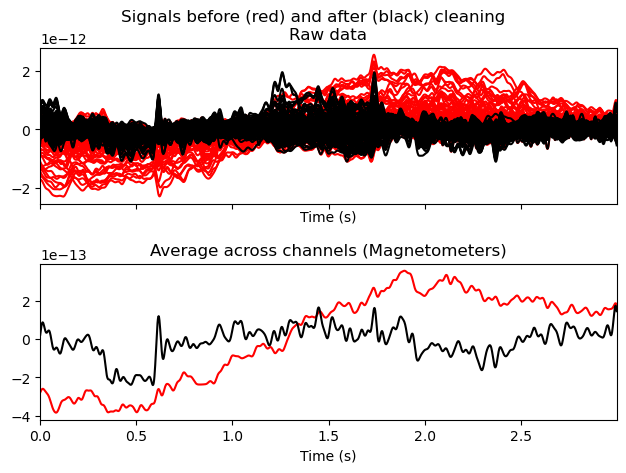

In [40]:
# ICA
ica_ = ICA(n_components=15, random_state=97)
ica_.fit(n_raw)
ica_


# Exclude certain components
"""
S001:[0,2]  # DONE
S002:[] 
S003:[] 
S004:[] 
S005:[] 
S006:[] 
S007:[] 
S008:[]
"""

#Plot ICA
#ica_.plot_sources(n_raw)
#ica_.plot_components()#sphere = (0.0, 0.02, 0.0, 0.065))  # What is this sphere for??
ica_.plot_overlay(n_raw, exclude=[0])

In [39]:
# Checking for every component
for i in range(15):
    #ica_.plot_properties(n_raw, picks=[i])
    ica_.plot_overlay(n_raw, exclude=[i])

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing o

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Not setting metadata
Not setting metadata
120 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 120 events and 301 original time points ...
    Rejecting  epoch based on MAG : ['MEG 017', 'MEG 018', 'MEG 019', 'MEG 020', 'MEG 048', 'MEG 052', 'MEG 060', 'MEG 061', 'MEG 062', 'MEG 063', 'MEG 064', 'MEG 081', 'MEG 082', 'MEG 083', 'MEG 084', 'MEG 089', 'MEG 102', 'MEG 105', 'MEG 113', 'MEG 117', 'MEG 120', 'MEG 121', 'MEG 125', 'MEG 129', 'MEG 130', 'MEG 131', 'MEG 132', 'MEG 133', 'MEG 134', 'MEG 135', 'MEG 136', 'MEG 137', 'MEG 138', 'MEG 139', 'MEG 140', 'MEG 141', 'MEG 142', 'MEG 143', 'MEG 144', 'MEG 145', 'MEG 146', 'MEG 147', 'MEG 148', 'MEG 149', 'MEG 150', 'MEG 151', 'MEG 152', 'MEG 153', 'MEG 154', 'MEG 155', 'MEG 156', 'MEG 

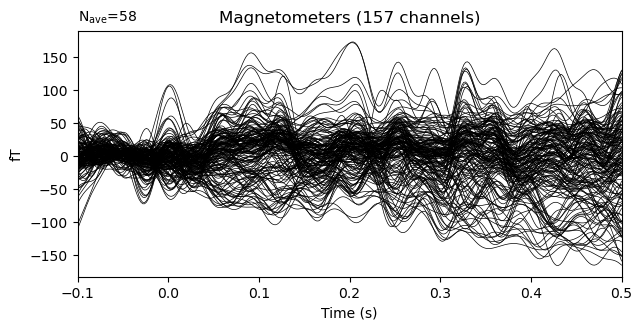

In [41]:
# ICAed epochs
# excluding wanted components
ica_.exclude = [0]

# ica.apply() changes the Raw object in-place, so let's make a copy first:
ICAed_raw = n_raw.copy()
ica_.apply(ICAed_raw)

all_epoch_LDT = mne.Epochs(ICAed_raw, events, event_id, tmin, tmax,
                    baseline=baseline,
                    reject = reject, preload = True)

evokedLDT = all_epoch_LDT.average()
evokedLDT.plot()

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 157 PCA components


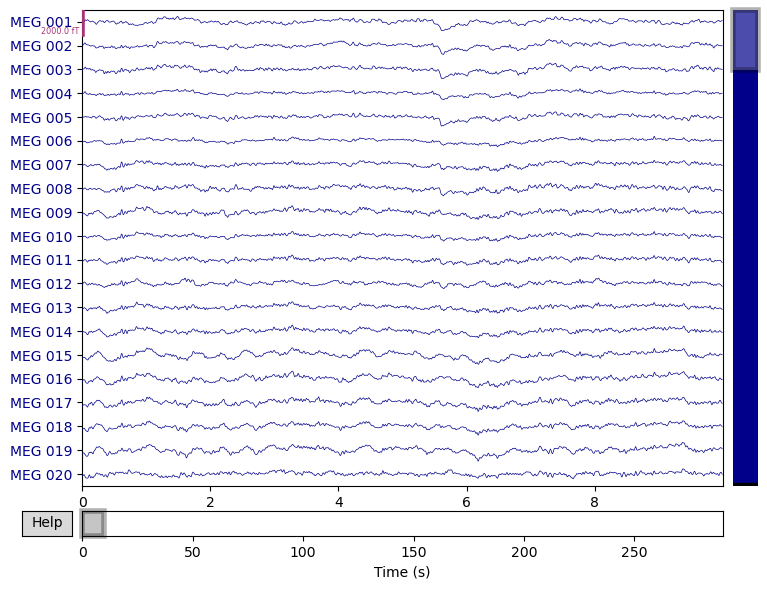

Channels marked as bad: none


In [76]:
#### What the hack is this?????

# This is the properties of each component
#ica_.plot_properties(n_raw, picks=[0, 1, 2, 3, 4, 5, 6, 7, 8])

# apply the cleaned ICA to the data 
ica_.exclude = [0,2]

raw_ICAed = n_raw.copy()
ica_.apply(raw_ICAed)
raw_ICAed.plot()

In [53]:
# Load in the csv file of word onset
csv_data = root_data_path / "S001_PLDT_raw_results.csv"
with open(csv_data, "r", encoding="UTF-8") as f:
    fileLIST = f.read().split("\n")
    fileLIST.pop(0)  # exclude the headlines
    fileLIST.pop(-1) # exclude the last one (blank)
    
    pprint(fileLIST)
    print(len(fileLIST))


['001,C,1,chaeviy,1,1,1339.0,',
 '001,L,2,laelaxst,1,0,1192.0,',
 '001,L,3,baepay,1,0,913.0,',
 '001,H,4,payliy,1,0,786.0,',
 '001,C,5,laeviy,1,1,979.0,',
 '001,H,6,vaesow,1,1,1257.0,',
 '001,H,7,browmey,1,0,1095.0,',
 '001,C,8,weyaet,1,1,1286.0,',
 '001,L,9,paenliy,1,1,952.0,',
 '001,C,10,maeskiy,1,1,1177.0,',
 '001,C,11,baydiy,1,1,1136.0,',
 '001,C,12,aegliy,1,0,1486.0,',
 '001,L,13,laelaxst,2,0,1170.0,',
 '001,C,14,maeskiy,2,1,967.0,',
 '001,C,15,laeviy,2,1,1046.0,',
 '001,H,16,vaesow,2,1,1146.0,',
 '001,H,17,payliy,2,0,1242.0,',
 '001,C,18,chaeviy,2,1,1125.0,',
 '001,C,19,baydiy,2,1,1217.0,',
 '001,C,20,weyaet,2,1,1575.0,',
 '001,L,21,baepay,2,0,1414.0,',
 '001,L,22,paenliy,2,1,1172.0,',
 '001,H,23,browmey,2,0,1483.0,',
 '001,C,24,aegliy,2,1,1541.0,',
 '001,H,25,vaesow,3,1,836.0,',
 '001,C,26,chaeviy,3,1,1061.0,',
 '001,H,27,browmey,3,0,1483.0,',
 '001,L,28,baepay,3,0,1223.0,',
 '001,C,29,maeskiy,3,1,1389.0,',
 '001,C,30,aegliy,3,1,1358.0,',
 '001,C,31,laeviy,3,1,1145.0,',
 '001,L,

In [73]:
all_eventsArray = events.copy()
#print(all_eventsArray[0][0])

# C == control group; H == H_CD; L == L_CD

# event_id >> C==9; H==1; L==2

C_LIST = []
H_LIST = []
L_LIST = []

for row in fileLIST:
    index_eventINT = fileLIST.index(row)
    #print(index_eventINT)
    row = row.split(",")
    conditionSTR = row[1]
    
    if conditionSTR == "C":
        #print(index_eventINT, "=", conditionSTR)
        all_eventsArray[index_eventINT][2] = 9
        #C_LIST.append(conditionSTR)

    if conditionSTR == "H":
        #print(index_eventINT, "=", conditionSTR)
        all_eventsArray[index_eventINT][2] = 1
        #H_LIST.append(conditionSTR)
        
    if conditionSTR == "L":       
        #print(index_eventINT, "=", conditionSTR)
        all_eventsArray[index_eventINT][2] = 2
        #L_LIST.append(conditionSTR)

all_eventsArray

array([[ 13299,      0,      9],
       [ 15608,      0,      2],
       [ 17793,      0,      2],
       [ 19712,      0,      1],
       [ 21511,      0,      9],
       [ 23497,      0,      1],
       [ 25763,      0,      1],
       [ 27869,      0,      9],
       [ 30161,      0,      2],
       [ 32121,      0,      9],
       [ 34307,      0,      9],
       [ 36452,      0,      9],
       [ 38945,      0,      2],
       [ 41131,      0,      9],
       [ 43116,      0,      9],
       [ 45169,      0,      1],
       [ 47328,      0,      1],
       [ 49581,      0,      9],
       [ 51713,      0,      9],
       [ 53939,      0,      9],
       [ 56525,      0,      2],
       [ 58950,      0,      2],
       [ 61136,      0,      1],
       [ 63629,      0,      9],
       [ 66174,      0,      1],
       [ 68014,      0,      9],
       [ 70079,      0,      1],
       [ 72572,      0,      2],
       [ 74798,      0,      9],
       [ 77197,      0,      9],
       [ 7

In [83]:
# Creating the new epochs
events = all_eventsArray  #mne.find_events(raw_ICAed, stim_channel='STI 014')  #just checking what stim_channel documenting what.
event_id = {'High_CD':1,'Low_CD':2, 'Control': 9}  

tmin = -0.1         								# pre stimulis interval (in seconds) #
tmax = 0.5          								# post stimulus interval #

baseline = (None, 0)  # tmin ~ 0 , -0.1s-0s   
reject = dict(mag=4e-12)

# Load in the channels layouts
kit_lay = mne.channels.read_layout("KIT-157")

n_raw.load_data().pick_types(meg=True, stim=False).filter(0, 30, phase= 'zero-double').resample(500)
n_epoch_LDT = mne.Epochs(raw_ICAed, events, event_id, tmin, tmax,
                    baseline=baseline,
                    reject = reject, preload = True)

n_epoch_LDT

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-12 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 sec)

Not setting metadata
Not setting metadata
120 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 120 events and 301 original time points ...
    Rejecting  epoch based on MAG : ['MEG 001', 'MEG 009', 'MEG 014', 'MEG 016', 'MEG 017', 'MEG 018', 'MEG 019', 'MEG 020', 'MEG 022', 'MEG 023', 'MEG 024', 'MEG 026', 'MEG 027', 'MEG 028', 'MEG 029', 'MEG 030', 'MEG 032', 'MEG 034', 'MEG 044', 'MEG 045', 'MEG 046', 'MEG 048', '

<Epochs |  58 events (all good), -0.1 - 0.5 sec, baseline [-0.1, 0] sec, ~21.2 MB, data loaded,
 'Control': 28
 'High_CD': 15
 'Low_CD': 15>

In [85]:
n_epoch_LDT.save(root_data_path / 'S001_ICAed_LDT-epo.fif')

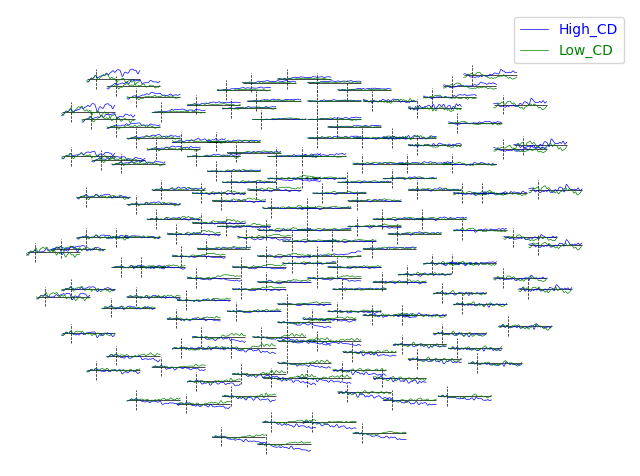

In [90]:
#evoked_C = n_epoch_LDT["Control"].average()
evoked_H = n_epoch_LDT["High_CD"].average()
evoked_L = n_epoch_LDT["Low_CD"].average()

#evoked_C.comment = 'Control'
evoked_H.comment = 'High_CD'
evoked_L.comment = 'Low_CD'

tmp = [evoked_H, evoked_L]#[evoked_C, evoked_H, evoked_L]
colors = 'blue', 'green'#'red', 'blue', 'green'
mne.viz.plot_evoked_topo(tmp, color = colors)

In [8]:
# Load in the csv file of word onset
#csv_data_path = "/Users/neuroling/Downloads/New_thesis/Ding-Thesis_ExpMaterials/"
csv_data_path = "/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Ding-Thesis_ExpMaterials/"
with open(csv_data_path + "AliceChapterOne-EEG.csv", "r", encoding="UTF-8") as f:
    fileLIST = f.read().split("\n")
    # the average of every word length is 0.2812(s) , approximately 300 ms
    
    word_onset_tapeLIST = []
    word_onset_allLIST = []
    tape_num_allLIST = []
    word_allLIST = []
    
    #exculde the header
    fileLIST.pop(0)
    print(len(fileLIST))
    
    
    for i in range(12):
        #print(i+1)
        word_onset_tapeLIST = []
        for row in fileLIST:    
            row = row.split(",")
            #print(row)
            #print(type(row))
            
            # some factors that are needed
            wordSTR = row[0]
            tape_numINT = int(row[1])
            word_onsetFLOAT = float(row[2])
            word_seqINT = int(row[10])
            sentence_seqINT = int(row[11])
            
            #print(sentence_seqINT)
            #print(type(sentence_seqINT))
            
            if tape_numINT == i+1:
                #print(wordSTR)
                
                word_onset_tapeLIST.append(word_onsetFLOAT)
            else:
                pass
        #pprint(word_onset_tapeLIST)
        print(len(word_onset_tapeLIST))
        word_onset_allLIST.append(word_onset_tapeLIST)
    #print(word_onset_allLIST)
    print(len(word_onset_allLIST))
    #for t in range(12):
        #print(len(word_onset_allLIST[t]))


2129
174
177
184
214
193
197
178
175
156
187
157
137
12


In [9]:
def correct_time(Start_timeFLOAT, End_timeFLOAT, stim_onsetFLOAT):
    '''
    to calculate the actual epoch start & end timepoints >>> Still need more calculation(NOT YET)
    
    Start_timeFLOAT = The timepoint of the segmented data start
    End_timeFLOAT = The timepoint of the segmented data end
    stim_onsetFLOAT = Every word onset timepoints
    '''
    actual_timeFLOAT = stim_onsetFLOAT*(End_timeFLOAT-Start_timeFLOAT)+(Start_timeFLOAT)
    return actual_timeFLOAT

def tpoints2sec(timepointsINT, sampling_rateINT):
    '''
    turn the timepoints to time (second, s) by divided by the sampling rate 
    >> mne.events_from_annotations(raw) >> event array[0]
    '''
    time_secFLOAT = timepointsINT/sampling_rateINT
    
    return time_secFLOAT
    

In [96]:
# Testing the tpoints2sec function

events = mne.events_from_annotations(raw_ICAed)
#print(events)

# covert the time points arrays into a list >> or is it better if we use it as the array??
trigger_tPointsNDArray = events[0]  #.tolist()
#print(trigger_tPointsNDArray)  

# Save the start % end timepoints into ndarray respectively.  
start_tNDarray = trigger_tPointsNDArray[::4]
#print(start_tNDarray)
#print(type(start_tNDarray))

end_tNDarray = trigger_tPointsNDArray[1::4]
#print(end_tNDarray)
#print(type(end_tNDarray))
#print(len(end_tNDarray))


for k in range(12):
    start_tFLOAT = tpoints2sec(start_tNDarray[k][0], 250)
    end_tFLOAT = tpoints2sec(end_tNDarray[k][0], 250)
    print(start_tFLOAT)
    print(end_tFLOAT)


Used Annotations descriptions: ['1', '10', '11', '12', '2', '3', '4', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '7', '8', '9', '99']
26.288
84.3
102.952
163.964
178.932
242.944
259.98
329.992
339.668
406.68
423.992
488.004
504.08
567.096
574.824
632.836
643.4
701.412
727.324
789.336
803.152
860.16
881.928
928.936


In [10]:
trigger_tPointsNDArray, event_idDICT = mne.events_from_annotations(raw_ICAed.copy())
#print(events)

# covert the time points arrays into a list >> or is it better if we use it as the array??
#trigger_tPointsNDArray = events[0]  #.tolist()
#print(trigger_tPointsNDArray)  

# Save the start % end timepoints into ndarray respectively.  
start_tNDarray = trigger_tPointsNDArray[::4]
print("Old start t points:",start_tNDarray)
#print(type(start_tNDarray))

end_tNDarray = trigger_tPointsNDArray[1::4]
print("Old end t points:",end_tNDarray)
#print(type(end_tNDarray))
print(len(end_tNDarray))


"""

### CONTINUE LATER ###
epoch_allLIST = []

# calculate the actual word onset by applying the min max scaling formula
for i in range(2):
    print(word_onset_allLIST[i])
    
    #start_tINT = start_tNDarray[i][0]
    #end_tINT = end_tNDarray[i][0]
    
    epoch_tapeLIST = []
    for onset_t in word_onset_allLIST[i]:
        start_tFLOAT = tpoints2sec(start_tNDarray[i][0], 250)
        end_tFLOAT = tpoints2sec(end_tNDarray[i][0], 250)
        
        epoch_onset = correct_time(start_tFLOAT, end_tFLOAT, onset_t)  #/1000
        #print(epoch_onset)        
        epoch_tapeLIST.append(epoch_onset)
    print(len(word_onset_allLIST[i]))
    #print(epoch_tapeLIST)
    print(len(epoch_tapeLIST))
    
    epoch_allLIST.append(epoch_tapeLIST)
print(epoch_allLIST)
print(len(epoch_allLIST))
"""

Used Annotations descriptions: ['1', '10', '11', '12', '2', '3', '4', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '7', '8', '9', '99']
Old start t points: [[  6572      0      1]
 [ 25738      0      5]
 [ 44733      0      6]
 [ 64995      0      7]
 [ 84917      0      8]
 [105998      0     19]
 [126020      0     22]
 [143706      0     23]
 [160850      0     24]
 [181831      0      2]
 [200788      0      3]
 [220482      0      4]]
Old end t points: [[ 21075      0     25]
 [ 40991      0     25]
 [ 60736      0     25]
 [ 82498      0     25]
 [101670      0     25]
 [122001      0     25]
 [141774      0     25]
 [158209      0     25]
 [175353      0     25]
 [197334      0     25]
 [215040      0     25]
 [232234      0     25]]
12


'\n\n### CONTINUE LATER ###\nepoch_allLIST = []\n\n# calculate the actual word onset by applying the min max scaling formula\nfor i in range(2):\n    print(word_onset_allLIST[i])\n    \n    #start_tINT = start_tNDarray[i][0]\n    #end_tINT = end_tNDarray[i][0]\n    \n    epoch_tapeLIST = []\n    for onset_t in word_onset_allLIST[i]:\n        start_tFLOAT = tpoints2sec(start_tNDarray[i][0], 250)\n        end_tFLOAT = tpoints2sec(end_tNDarray[i][0], 250)\n        \n        epoch_onset = correct_time(start_tFLOAT, end_tFLOAT, onset_t)  #/1000\n        #print(epoch_onset)        \n        epoch_tapeLIST.append(epoch_onset)\n    print(len(word_onset_allLIST[i]))\n    #print(epoch_tapeLIST)\n    print(len(epoch_tapeLIST))\n    \n    epoch_allLIST.append(epoch_tapeLIST)\nprint(epoch_allLIST)\nprint(len(epoch_allLIST))\n'

In [11]:
# Creating epochs (cutting into epochs so to speak)

epoch_allLIST = []

# To calculate the actual time for every word_onset, and save it down as a bug LIST
for i in range(12):
    #start_tFLOAT = tpoints2sec(start_tNDarray[i][0], 250)
    #end_tFLOAT = tpoints2sec(end_tNDarray[i][0], 250)
    #print(start_tFLOAT)
    #print(end_tFLOAT)        
    epoch_tapeLIST = []
    
    for onset_tFLOAT in word_onset_allLIST[i]:
        #print(type(onset_tFLOAT))
        
        start_tFLOAT = tpoints2sec(start_tNDarray[i][0], 250)
        end_tFLOAT = tpoints2sec(end_tNDarray[i][0], 250)
        
        epoch_onsetFLOAT = start_tFLOAT + onset_tFLOAT  #/1000
        #print(epoch_onsetFLOAT)
        
        epoch_tapeLIST.append(epoch_onsetFLOAT)

    #print(epoch_tapeLIST)
    #print(len(epoch_tapeLIST))
    
    epoch_allLIST.append(epoch_tapeLIST)
    
#print(epoch_allLIST)
#print(len(epoch_allLIST))


In [ ]:
def newTag4word_onsetARRAY(epoch_allLIST, sampling_rate)   #, loop_counts):  #, epoch_onsetFLOAT
    '''
    Turn the word onset time into a ndarray for further epoch dissection
    
    epoch_onsetFLOAT = Coverted word onset time based on the individual's raw data (in seconds)
    sampling_rate = The sampling rate of the current data
    #loop_counts = How many times do you want to repeat the procedure = the length of the epoch_allLIST
    '''
    #loop_counts = len
    
    for i in range(len(epoch_allLIST)):
    

In [151]:
def correct_time(Start_timeFLOAT, End_timeFLOAT, stim_onsetFLOAT):
    '''
    to calculate the actual epoch start & end timepoints >>> Still need more calculation(NOT YET)
    
    Start_timeFLOAT = The timepoint of the segmented data start
    End_timeFLOAT = The timepoint of the segmented data end
    stim_onsetFLOAT = Every word onset timepoints
    '''
    actual_timeFLOAT = stim_onsetFLOAT*(End_timeFLOAT-Start_timeFLOAT)+(Start_timeFLOAT)
    return actual_timeFLOAT

# (NOT YET)calculate a more precise datapoint for future epoch calculation
import math  # for 無條件進位

for i in range(12):
    min
    for onset_tFLOAT in word_onset_allLIST[i]:
        
        tmp_timeFLOAT = (word_onsetFLOAT-word_onset_minFLOAT)/(word_onset_maxFLOAT-word_onset_minFLOAT)
    actual_timeINT = math.ceil(tmp_timeFLOAT*trigger_dINT)

"""
for i in range(12):
    tape_tagINT = 26  # for the new event_idDICT's tag  i.e "tape1_word_onset":26 etc.
    for epoch_tFLOAT in epoch_allLIST[i]:
        epoch_tPointsINT = round((epoch_tFLOAT*250), 1)
        n_epoch_tPointsINT = math.ceil(epoch_tFLOAT*250)
        #print(epoch_tPointsINT)
        #print(n_epoch_tPointsINT)
        
        onset_tPointsLIST = [n_epoch_tPointsINT, 0, tape_tagINT]
        all_onset_tPointsLIST.append(onset_tPointsLIST)
all_onset_tPointsARRAY = np.array(all_onset_tPointsLIST)
"""

SyntaxError: expected ':' (2492082761.py, line 15)

In [12]:
# calculate the word onset datapoint
import math  # for 無條件進位

all_onset_tPointsLIST = []
for i in range(12):
    tape_tagINT = 26  # for the new event_idDICT's tag  i.e "tape1_word_onset":26 etc.
    for epoch_tFLOAT in epoch_allLIST[i]:
        epoch_tPointsINT = round((epoch_tFLOAT*250), 1)
        n_epoch_tPointsINT = math.ceil(epoch_tFLOAT*250)
        #print(epoch_tPointsINT)
        #print(n_epoch_tPointsINT)
        
        onset_tPointsLIST = [n_epoch_tPointsINT, 0, tape_tagINT]
        all_onset_tPointsLIST.append(onset_tPointsLIST)
all_onset_tPointsARRAY = np.array(all_onset_tPointsLIST)

print(all_onset_tPointsARRAY[:200])
#print(len(all_onset_tPointsARRAY))
print(all_onset_tPointsARRAY.shape)


[[ 6584     0    26]
 [ 6713     0    26]
 [ 6769     0    26]
 [ 6887     0    26]
 [ 6911     0    26]
 [ 6977     0    26]
 [ 7150     0    26]
 [ 7272     0    26]
 [ 7307     0    26]
 [ 7399     0    26]
 [ 7444     0    26]
 [ 7486     0    26]
 [ 7599     0    26]
 [ 7641     0    26]
 [ 7672     0    26]
 [ 7769     0    26]
 [ 7800     0    26]
 [ 7831     0    26]
 [ 7931     0    26]
 [ 8045     0    26]
 [ 8085     0    26]
 [ 8359     0    26]
 [ 8418     0    26]
 [ 8447     0    26]
 [ 8562     0    26]
 [ 8638     0    26]
 [ 8713     0    26]
 [ 8767     0    26]
 [ 8793     0    26]
 [ 8880     0    26]
 [ 8901     0    26]
 [ 9000     0    26]
 [ 9063     0    26]
 [ 9275     0    26]
 [ 9304     0    26]
 [ 9326     0    26]
 [ 9395     0    26]
 [ 9428     0    26]
 [ 9555     0    26]
 [ 9581     0    26]
 [ 9793     0    26]
 [ 9826     0    26]
 [10017     0    26]
 [10058     0    26]
 [10100     0    26]
 [10129     0    26]
 [10174     0    26]
 [10254     0

In [13]:
#event_idDICT = events[1]
pprint(event_idDICT)
# Copy the original event id, in case any irreversible changes happened
copied_event_idDICT = event_idDICT.copy()
#print(copied_event_idDICT)

# Set up the word onset tag's event_id DICT
"""
tape_word_onsetDICT = {'tape1_word_onset': 26,
                       'tape2_word_onset': 27,
                       'tape3_word_onset': 28,
                       'tape4_word_onset': 29,
                       'tape5_word_onset': 30,
                       'tape6_word_onset': 31,
                       'tape7_word_onset': 32,
                       'tape8_word_onset': 33,
                       'tape9_word_onset': 34,
                       'tape10_word_onset': 35,
                       'tape11_word_onset': 36,
                       'tape12_word_onset': 37}
                       """
tape_word_onsetDICT = {'tape_word_onset': 26}

# Combine the original event_idDICT with the word_onset tag DICT
copied_event_idDICT.update(tape_word_onsetDICT)
pprint(copied_event_idDICT)


{'1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '2': 5,
 '3': 6,
 '4': 7,
 '5': 8,
 '50': 9,
 '51': 10,
 '52': 11,
 '53': 12,
 '54': 13,
 '55': 14,
 '56': 15,
 '57': 16,
 '58': 17,
 '59': 18,
 '6': 19,
 '60': 20,
 '61': 21,
 '7': 22,
 '8': 23,
 '9': 24,
 '99': 25}
{'1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '2': 5,
 '3': 6,
 '4': 7,
 '5': 8,
 '50': 9,
 '51': 10,
 '52': 11,
 '53': 12,
 '54': 13,
 '55': 14,
 '56': 15,
 '57': 16,
 '58': 17,
 '59': 18,
 '6': 19,
 '60': 20,
 '61': 21,
 '7': 22,
 '8': 23,
 '9': 24,
 '99': 25,
 'tape_word_onset': 26}


In [14]:
# Create the epochs based on the new event id
"""
tmin = -0.5                                         # pre stimulis interval (in seconds) #
tmax = 1.0                                          # post stimulus interval #

picks = mne.pick_types(raw_.info, eeg= True, stim = False)    # channels to use in epochs #
baseline = (-0.1, 0)      
reject_ = dict(eeg=100e-6) # eeg: V, meg: T                                                       # what to use as baseline comparison - here it's pre-stim interval #
epochs = mne.Epochs(raw_clean, new_events, event_id, tmin, tmax, proj = True,
                    picks = picks, baseline=baseline,
                    reject = reject_, preload = True)
"""

new_event_idDICT = tape_word_onsetDICT  #copied_event_idDICT
tmin = -0.1      # pre stimulis interval (in second) #
tmax = 0.5       # post stimulus interval (in second) # 

picks = mne.pick_types(raw_ICAed.copy().info, eeg= True, stim = False)    # channels to use in epochs #
baseline = (-0.1, 0)      
reject_ = dict(eeg=100e-6) # eeg: V, meg: T                                                       # what to use as baseline comparison - here it's pre-stim interval #
epochs = mne.Epochs(raw_ICAed.copy(), all_onset_tPointsARRAY, new_event_idDICT, tmin, tmax, proj=True,
                    picks=picks, baseline=baseline,
                    reject=reject_, preload=True)   #reject = reject_ original
        

Not setting metadata
Not setting metadata
2129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 2129 events and 151 original time points ...
0 bad epochs dropped


In [17]:
# plotting the epochs based on each word onset in every tape
"""
# evoked based on each tape
for tapeINT in range(12):
    tape_evoked = epochs['tape%s_word_onset' %str(tapeINT+1)].average().apply_baseline((-0.1, 0)).pick_types(eeg= True, stim = False).crop(-0.1, 0.5 )
    tape_evoked.plot_topo()
"""
# evoked of every word
tape_evoked = epochs['tape_word_onset'].average().apply_baseline((-0.1, 0)).pick_types(eeg= True, stim = False).crop(-0.1, 0.5)
tape_evoked.plot()
#tape_evoked.plot_topo()
#tape_evoked.plot_topomap()

    
    
"""
# Make a comparison
tmp = [std_evoked, devL_evoked, devS_evoked]
colors = 'red', 'blue', 'green'
#mne.viz.plot_evoked_topo(tmp, color = colors, title = 'MMN', ylim = dict(eeg=[10, -10]))
mne.viz.plot_compare_evokeds(tmp, colors = colors, axes = 'topo')
"""

Applying baseline correction (mode: mean)


"\n# Make a comparison\ntmp = [std_evoked, devL_evoked, devS_evoked]\ncolors = 'red', 'blue', 'green'\n#mne.viz.plot_evoked_topo(tmp, color = colors, title = 'MMN', ylim = dict(eeg=[10, -10]))\nmne.viz.plot_compare_evokeds(tmp, colors = colors, axes = 'topo')\n"

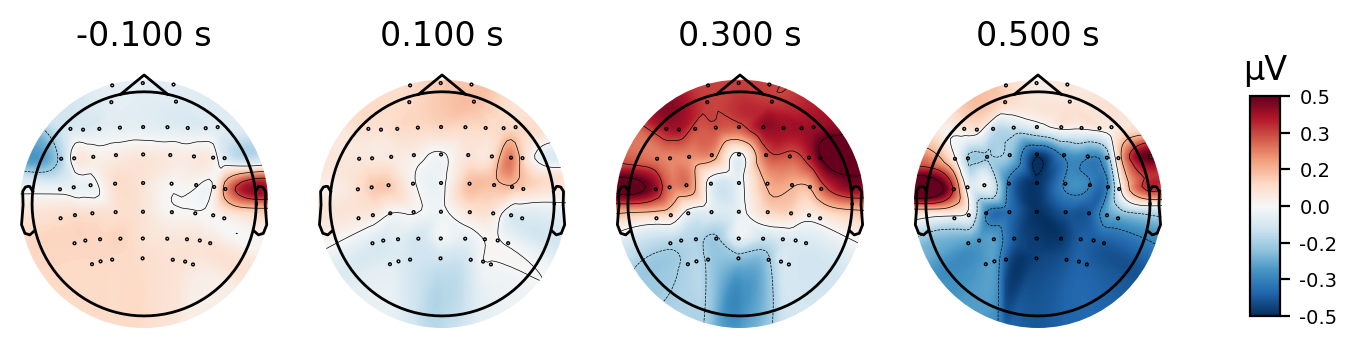

In [148]:
tape_evoked.plot_topomap()

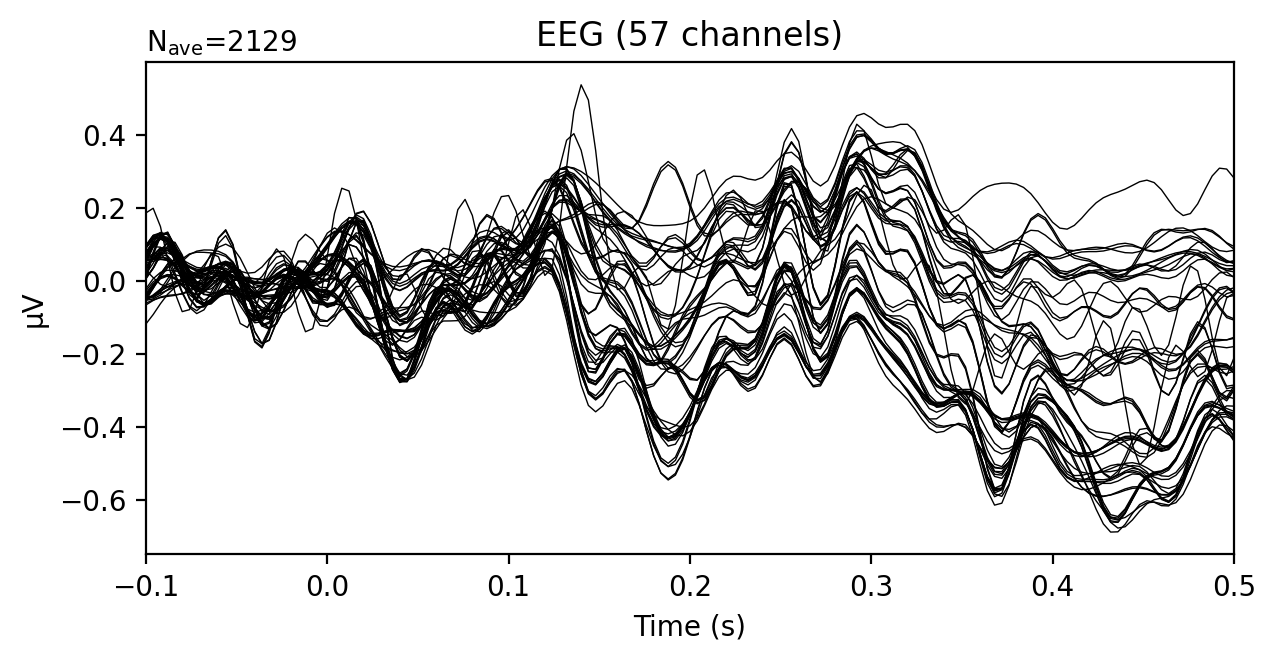

In [150]:
tape_evoked.plot()

## Below are the old codes

In [ ]:
# Use the event id >> should segment the data first??
event_id = {'1': 1, '10': 2, '11': 3, '12': 4, '2': 5, '3': 6, '4': 7, '5': 8, '6': 9, '7': 10, '8': 11, '9': 12, '99': 13}
#{'1': 1, '10': 2, '11': 3, '12': 4, '2': 5, '3': 6, '4': 7, '5': 8, '6': 9, '7': 10, '8': 11, '9': 12, '99': 13}
                                        # state which conditions match with which triggers #

# each epoch would be 300 ms long 
# >> start_timepoint = each onset, end_timepoint = onset + 0.3 
# need to recalibrate the starting time point in every part of 
tmin = -0.5                                         # pre stimulis interval (in seconds) #
tmax = 1.0                                          # post stimulus interval #

picks = mne.pick_types(raw_.info, eeg= True, stim = False)    # channels to use in epochs #
baseline = (-0.1, 0)      
reject_ = dict(eeg=100e-6) # eeg: V, meg: T                                                       # what to use as baseline comparison - here it's pre-stim interval #
epochs = mne.Epochs(raw_clean, new_events, event_id, tmin, tmax, proj = True,
                    picks = picks, baseline=baseline,
                    reject = reject_, preload = True)

In [ ]:
# see the average of the epochs, I think

std_evoked = epochs['Standard (yi3)'].average().apply_baseline((-0.1, 0)).pick_types(eeg= True, stim = False).crop(-0.1, 0.7)
devL_evoked = epochs['Large deviant (yi1)'].average().apply_baseline((-0.1, 0)).pick_types(eeg= True, stim = False).crop(-0.1, 0.7)
devS_evoked = epochs['Small deviant (yi2)'].average().apply_baseline((-0.1, 0)).pick_types(eeg= True, stim = False).crop(-0.1, 0.7)

print(std_evoked)
print(devL_evoked)
print(devS_evoked)

In [22]:
# OLD VERSION OF CUTTING THE FILES

# List out the triggers #the starting and ending time point for each tape #時間要除以1000=事件發生的時間點
events = mne.events_from_annotations(raw_ICAed)
#print(events)

# covert the time points arrays into a list >> or is it better if we use it as the array??
trigger_tPointsNDArray = events[0]  #.tolist()
#print(trigger_tPointsNDArray)  

"""
dict.keys()
dict.values()
dict.items()

triggerLIST = list(range(1,13))
#print(triggerLIST)

trigger_nameDICT = events[1]
triggerkey = trigger_nameDICT.keys()
trigger_nameDICT.keys()    # the actual number mark I made for trigger
print(trigger_nameDICT.values())  # 1-25
"""

# Save the start % end timepoints into ndarray respectively.  
start_tNDarray = trigger_tPointsNDArray[::4]
print(start_tNDarray)
#print(type(start_tNDarray))
end_tNDarray = trigger_tPointsNDArray[1::4]
print(end_tNDarray)
#print(type(end_tNDarray))
print(len(end_tNDarray))

save_data_path = "/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG/S007_cut/"
"""
# cut the data by the timepoints
for i in range(12):
    # timepoint is in ms! (%1000 when needs to see in minute)
    start_t = start_tNDarray[i][0]/1000
    end_t = end_tNDarray[i][0]/1000
    print("start at", start_t, ";", "ends at", end_t)
    
    # cut the parts by the start & end timepoints (= save as each tapes)
    cut_file = raw_ICAed.copy().crop(tmin = start_t, tmax= end_t)
    cut_file.save(save_data_path + "S007-Alice_{}cut.fif".format(i+1), overwrite = True)
    print("DONE")
print("ALL DONE")
"""

Used Annotations descriptions: ['1', '10', '11', '12', '2', '3', '4', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '7', '8', '9', '99']
[[  6572      0      1]
 [ 25738      0      5]
 [ 44733      0      6]
 [ 64995      0      7]
 [ 84917      0      8]
 [105998      0     19]
 [126020      0     22]
 [143706      0     23]
 [160850      0     24]
 [181831      0      2]
 [200788      0      3]
 [220482      0      4]]
[[ 21075      0     25]
 [ 40991      0     25]
 [ 60736      0     25]
 [ 82498      0     25]
 [101670      0     25]
 [122001      0     25]
 [141774      0     25]
 [158209      0     25]
 [175353      0     25]
 [197334      0     25]
 [215040      0     25]
 [232234      0     25]]
12


'\n# cut the data by the timepoints\nfor i in range(12):\n    # timepoint is in ms! (%1000 when needs to see in minute)\n    start_t = start_tNDarray[i][0]/1000\n    end_t = end_tNDarray[i][0]/1000\n    print("start at", start_t, ";", "ends at", end_t)\n    \n    # cut the parts by the start & end timepoints (= save as each tapes)\n    cut_file = raw_ICAed.copy().crop(tmin = start_t, tmax= end_t)\n    cut_file.save(save_data_path + "S007-Alice_{}cut.fif".format(i+1), overwrite = True)\n    print("DONE")\nprint("ALL DONE")\n'

In [ ]:
tmp = [std_evoked, devL_evoked, devS_evoked]
colors = 'red', 'blue', 'green'
#mne.viz.plot_evoked_topo(tmp, color = colors, title = 'MMN', ylim = dict(eeg=[10, -10]))
mne.viz.plot_compare_evokeds(tmp, colors = colors, axes = 'topo')